<a href="https://colab.research.google.com/github/hyeokjun0804/ML-DL/blob/main/03_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 전처리
###201814076 IT융합자율학부 권혁준

In [ ]:
#도미와 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np

In [ ]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
print(fish_data[:5]) #데이터 5개 출력

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
fish_data.ndim # ndim 배열 차원이 몇인지 알려줌

2

In [ ]:
fish_data.shape

(49, 2)

In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
np.ones(35)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [ ]:
np.zeros(14)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #concatenate 한줄로 연결

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
fish_target.shape

(49,)

##사이킷런

In [ ]:
from  sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) #train_test_split() 3:1 비울로 훈련세트 테스트세트 분할, random_state를 안넣어도 코드 돌아감

In [ ]:
print(train_input.shape,test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


##K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]])) #도미(1)이 나와야하는데 빙어(0)이 나옴

[0.]


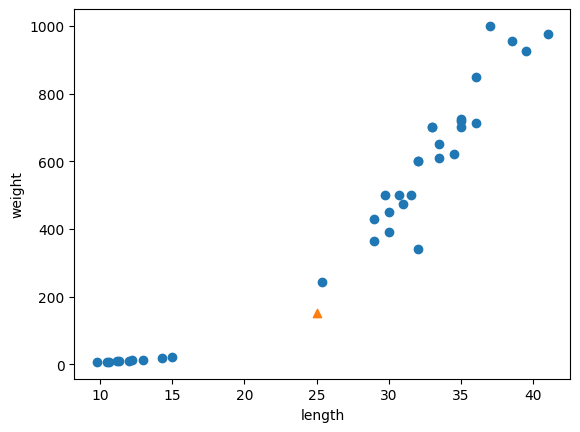

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distances, indexes = kn.kneighbors([[25,150]]) #2차원 데이터라 한번 더 [ ] 써줌

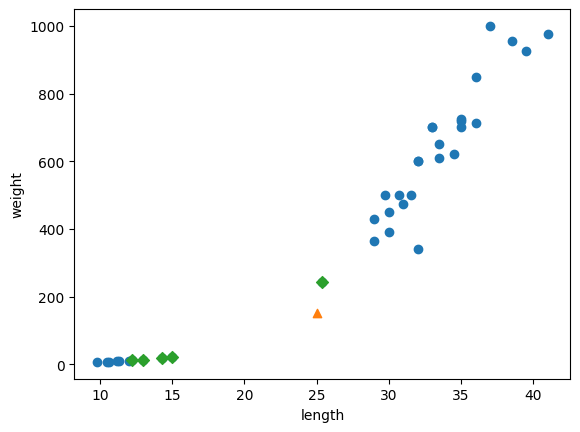

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes]) #빙어가 더  가까움

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


#기준 맞추기(데이터 전처리)

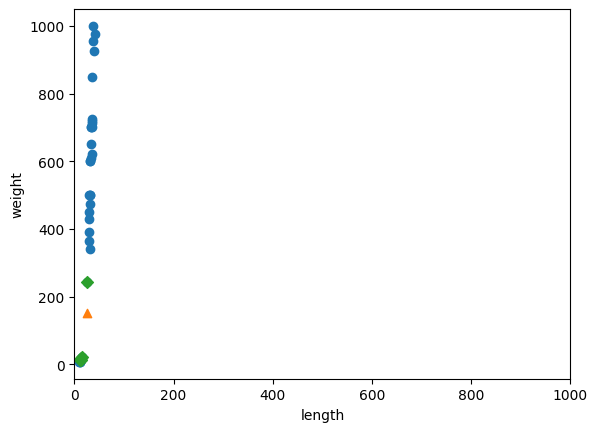

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
np.mean(train_input, axis=0) #mean: 평균

array([ 27.29722222, 454.09722222])

In [ ]:
np.mean(train_input, axis=1)

array([264.85,  12.2 , 366.5 ,  10.  , 482.25, 229.5 , 375.  , 443.  ,
       253.  , 377.5 , 518.5 ,  10.5 , 327.25,  10.9 , 196.  , 366.5 ,
       265.35, 496.75, 341.75,  17.  , 265.75, 133.7 ,   8.25, 316.  ,
         9.  , 321.75,   8.8 , 367.5 , 316.  , 380.  ,  12.6 , 240.  ,
       186.  ,  17.45, 210.  , 508.  ])

In [ ]:
np.std(train_input, axis=0) #std: 표준편차

array([  9.98244253, 323.29893931])

In [ ]:
np.std(train_input, axis=1)

array([2.3515e+02, 0.0000e+00, 3.3350e+02, 1.3000e+00, 4.4275e+02,
       2.0050e+02, 3.3900e+02, 4.0700e+02, 2.2200e+02, 3.4250e+02,
       4.8150e+02, 7.0000e-01, 2.9275e+02, 1.1000e+00, 1.6700e+02,
       3.3350e+02, 2.3465e+02, 4.5825e+02, 3.0825e+02, 2.7000e+00,
       2.3425e+02, 1.0830e+02, 1.5500e+00, 2.8400e+02, 1.5000e+00,
       2.8825e+02, 1.8000e+00, 3.3250e+02, 2.8400e+02, 3.4500e+02,
       4.0000e-01, 2.1000e+02, 1.5400e+02, 2.4500e+00, 1.8000e+02,
       4.6700e+02])

In [ ]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [ ]:
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
train_scaled = (train_input - mean) / std #표준점수구하기

##전처리 데이터로 모델 훈련

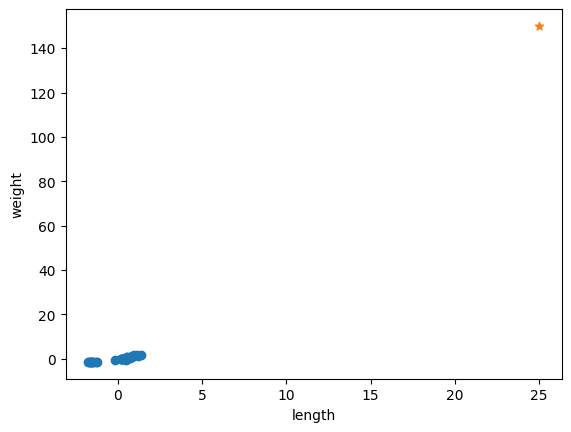

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

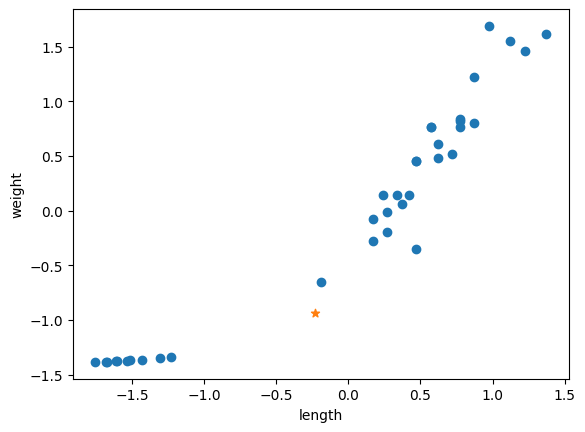

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker ='*')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean) / std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


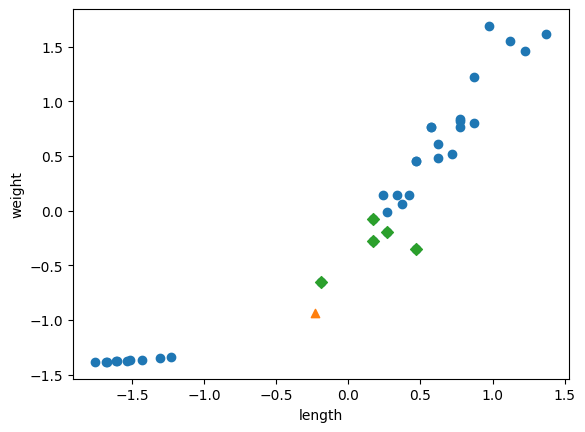

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()